# Transfer Learning with MNIST

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries.
import numpy as np
import matplotlib.pyplot as plt

# Required to get tensorflow to work on a notebook on my computer.
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = "True"

## Data Exploration

In [2]:
# Fashion MNIST dataset that resembles MNIST but with clothing categories.
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Class names are not included in the dataset.
class_names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# There are 60000 images. Each is a 28x28 grid.
train_images.shape

(60000, 28, 28)

In [5]:
# Sanity check that the labels look correct.
train_labels, len(train_labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

In [6]:
# Sanity check that the test images look correct.
test_images.shape

(10000, 28, 28)

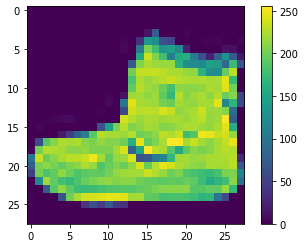

In [7]:
# Take a look at an image.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Pixels have values between 0 and 255... Normalize this to the range [0, 1].
train_images = train_images / 255.0

test_images = test_images / 255.0

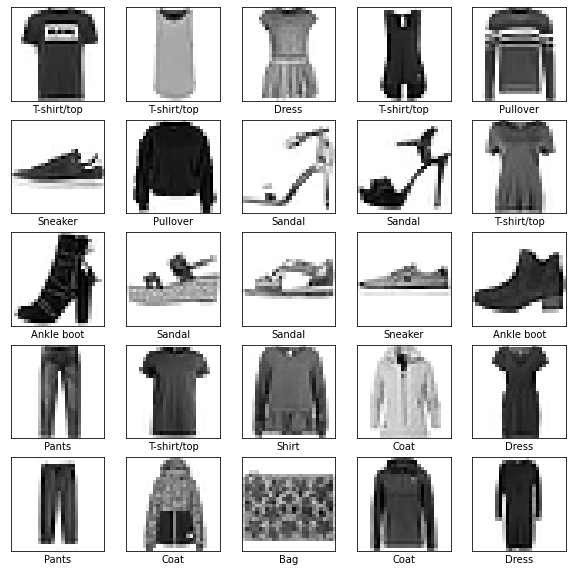

In [9]:
# Show all the categories.
plt.figure(figsize=(10,10))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Modeling

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Unpack the model from a 28x28 matrix to an array.
    keras.layers.Dense(128, activation='relu'),  # Fully-connected layer of 128 neurons.
    keras.layers.Dense(10, activation='softmax') # Fully-connected layer of 10 neurons (1 per class).
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 15 Training epochs should be enough.
model.fit(test_images, test_labels, epochs=30)

Epoch 1/30
313/313 [==============================] - 4s 6ms/step - loss: 0.9876 - accuracy: 0.6585
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5541 - accuracy: 0.8082
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 0.4710 - accuracy: 0.8380
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 0.4424 - accuracy: 0.8406
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 0.4177 - accuracy: 0.8534
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 0.3944 - accuracy: 0.8552
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 0.3702 - accuracy: 0.8656
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 0.3427 - accuracy: 0.8775
Epoch 9/30
313/313 [==============================] - 1s 5ms/step - loss: 0.3270 - accuracy: 0.8852
Epoch 10/30
313/313 [==============================] - 2s 6ms/step - loss: 0.2995 - accuracy: 0.8944

In [13]:
# Find the loss.
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(" ")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 3s 5ms/step - loss: 0.1522 - accuracy: 0.9451: 0s - loss: 0.1
 
Test accuracy: 0.9451000094413757


In [14]:
predictions = model.predict(test_images)

In [15]:
# Make sure that the predictions make sense.
predictions[0]

array([1.6876481e-09, 4.7421534e-13, 2.9510220e-08, 2.0321998e-10,
       8.6657963e-08, 2.0487949e-02, 1.0684530e-06, 8.5904384e-03,
       6.1043617e-03, 9.6481609e-01], dtype=float32)

In [16]:
# Show the category that the model was most confident about for this image.
np.argmax(predictions[0])

9

In [17]:
def plot_image(dataset, predictions_array, true_label, index):    
    # Get the true and predicted labels.
    true_label = true_label[index]
    predicted_label = np.argmax(predictions_array[index])

    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"    
    
    # Show the image.
    plt.xlabel("{} {:2.0f}% (actual: {})".format(class_names[predicted_label],
                                100 * np.max(predictions_array[index]),
                                class_names[true_label]),
                                color = color)

    plt.imshow(dataset[index], cmap=plt.cm.binary)


def plot_value_array(predictions, true_label, index):
    # Get the true and predicted labels and the predictions array.
    predictions_array = predictions[index]
    predicted_label = np.argmax(predictions_array)
    true_label = true_label[index]
    
    # Add visual aids.
    plt.grid(False), plt.xticks(range(10)), plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")   
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.xlabel("Category confidence")

    # Prevent the graph from scaling to fit the bars.
    plt.ylim([0, 1])


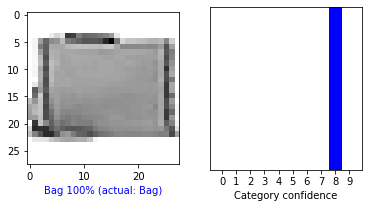

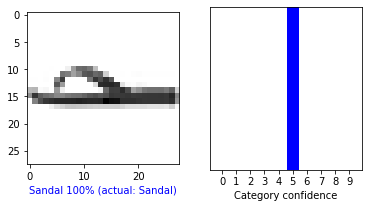

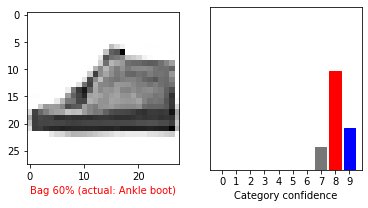

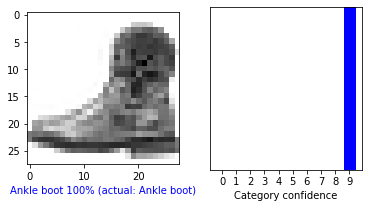

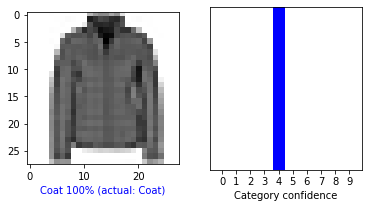

In [18]:
# Graph some items from the dataset.
# index 107 is an error
for index in range(105, 110):
    
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(test_images, predictions, test_labels, index)

    plt.subplot(1,2,2)
    plot_value_array(predictions, test_labels, index)
    plt.show()

## Transfer Learning
In normal machine learning applications, a dataset is split into a training and test dataset (see cell #2 under **Data**). The classifier is then trained on the training set and its accuracy is judged against the test dataset. In transfer learning, a new test dataset is used: a completely different *corpus* with the same theme. I created a small transfer learning corpus (10 images) that I got my Googling several clothing items.

In [20]:
# Show the local dataset I cobbled together.
! ls ~/Desktop/clothing_data/

ls: /Users/cameronsmith/Desktop/clothing_data/: No such file or directory


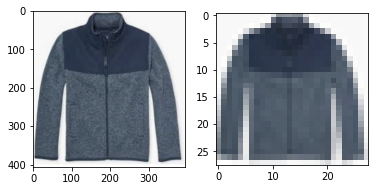

In [21]:
# Take a look at what an item looks like before/after being resized
from PIL import Image

im_normal = Image.open("../data/clothing_data/jacket.png")
im_small = im_normal.resize((28, 28))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im_normal)
plt.subplot(1,2,2)
plt.imshow(im_small)
plt.show()

In [22]:
# Collect the data into a numpy array.
data_dir = "../data/clothing_data"
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]

files = []
for f in file_paths:
    im = Image.open(f).resize((28, 28))
    im = np.array(im)
    imr = im[:, :, 2] # choose one of the color channels... this is not ideal: should be converted to black-and-white
    files.append(imr)

# Normalize the color range.
transfer_data = np.array(files) / 255.0

# Invert the colors so that the representation matches the training dataset.
transfer_data = 1 - transfer_data

In [23]:
# Check that the shape is correct.
transfer_data.shape

(12, 28, 28)

In [24]:
# Get the predictions using the model trained on the MNIST corpus.
predictions_2 = model.predict(transfer_data)

In [25]:
# Modify these functions so that they no longer take the "label" arguments -- we don't have labels!
def plot_image_transfer(dataset, predictions_array, index):
    # Get the true and predicted labels.
    predicted_label = np.argmax(predictions_array[index])
    
    # Show the image.
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label], 100 * np.max(predictions_array[index])))
    plt.imshow(dataset[index], cmap=plt.cm.binary)

def plot_value_array_transfer(predictions, index):
    # Get the true and predicted labels and the predictions array.
    predictions_array = predictions[index]
    predicted_label = np.argmax(predictions_array)
    
    # Add visual aids.
    plt.grid(False), plt.xticks(range(10)), plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")   
    plt.xlabel("Category confidence")

    # Prevent the graph from scaling to fit the bars.
    plt.ylim([0, 1])

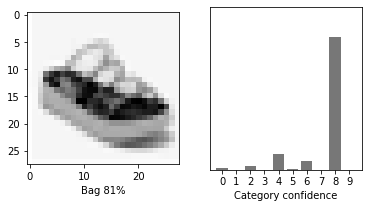

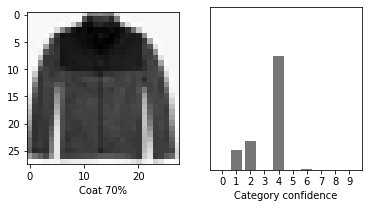

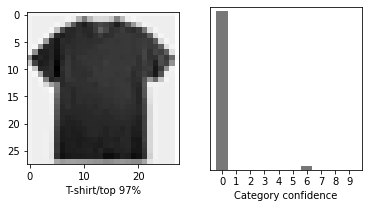

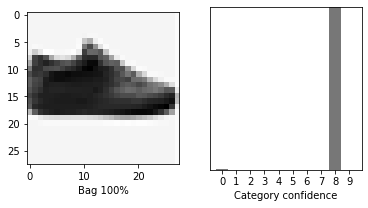

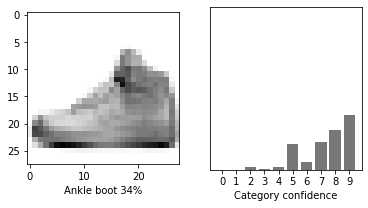

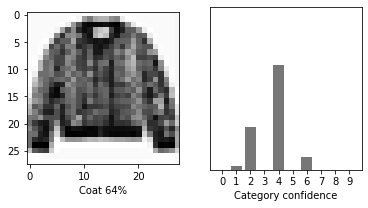

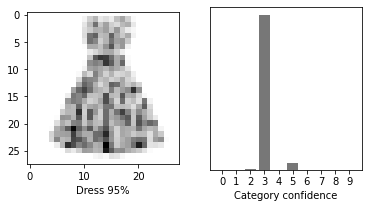

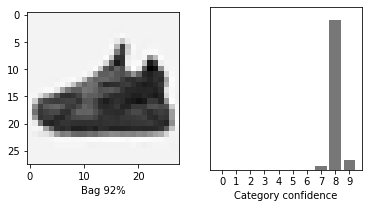

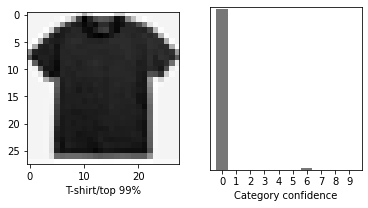

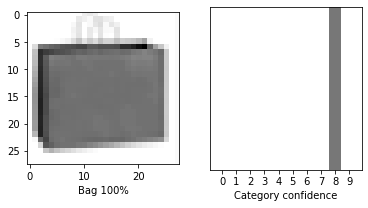

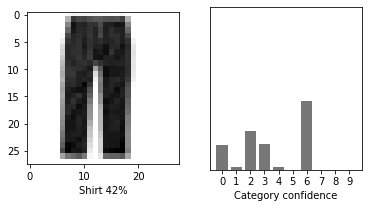

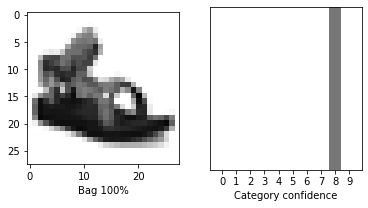

In [26]:
# Plot the data.
for index in range(0, 12): 
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image_transfer(transfer_data, predictions_2, index)

    plt.subplot(1,2,2)
    plot_value_array_transfer(predictions_2, index)
    plt.show()

Notice that while the predictions are mostly reasonable, the algorithm is less certain of its predictions. In the MNIST test set, the confidences were either close to 0 or close to 1. Here they are all over the place. This makes sense, as the data does not originate from MNIST.